In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 
import statsmodels.api as sm
from patsy import dmatrices 

# model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import seaborn

In [2]:
grouped = pd.read_csv('icd_grouped2.csv')
grouped.shape

(69617, 16)

In [3]:
grouped = grouped[:634709]
grouped.tail()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP
69612,2747,2724,Hyperlipidemia NEC/NOS,Other and unspecified hyperlipidemia,27,3,270-279,272,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders of lipoid metabolism,18741.0,197563.0,M,7/21/39 0:00,0.0,NaN
69613,2747,2724,Hyperlipidemia NEC/NOS,Other and unspecified hyperlipidemia,27,3,270-279,272,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders of lipoid metabolism,18756.0,161370.0,F,1840-12-01 00:00:00,0.0,NaN
69614,2747,2724,Hyperlipidemia NEC/NOS,Other and unspecified hyperlipidemia,27,3,270-279,272,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders of lipoid metabolism,18764.0,137802.0,M,2/5/84 0:00,1.0,NaN
69615,2747,2724,Hyperlipidemia NEC/NOS,Other and unspecified hyperlipidemia,27,3,270-279,272,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders of lipoid metabolism,18771.0,134750.0,F,1/15/13 0:00,0.0,NaN
69616,2747,2724,Hyperlipidemia NEC/NOS,Other and unspecified hyperlipidemia,27,3,270-279,272,OTHER M,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
grouped.shape

(69617, 16)

In [5]:
merged=pd.read_csv('icd_grouped.csv')
merged.head(30)

#DOD 0 if not died, 1 if died 
#Missing Subject ID

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,581403.0,84318.0,188604.0,5.0,42458.0,F,7/17/39 0:00,0.0,NaN,NaN,0.0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,137110.0,12139.0,148809.0,3.0,11489.0,M,1/24/92 0:00,0.0,NaN,NaN,0.0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,236331.0,21192.0,140260.0,8.0,19998.0,M,10/17/86 0:00,0.0,NaN,NaN,0.0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,437948.0,52831.0,106939.0,3.0,34186.0,M,4/18/01 0:00,0.0,NaN,NaN,0.0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,459979.0,57599.0,180150.0,4.0,35441.0,F,8/24/59 0:00,0.0,NaN,NaN,0.0
5,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,465492.0,58702.0,114246.0,18.0,35752.0,F,11/17/61 0:00,1.0,12/6/14 0:00,12/6/14 0:00,1.0
6,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,512387.0,68946.0,182954.0,9.0,38472.0,M,1854-03-20 00:00:00,1.0,9/19/54 0:00,9/19/54 0:00,1.0
7,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,589168.0,86226.0,106915.0,2.0,42918.0,M,12/29/64 0:00,0.0,NaN,NaN,0.0
8,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,604333.0,89840.0,186211.0,9.0,43862.0,M,6/25/10 0:00,1.0,10/27/92 0:00,10/27/92 0:00,1.0
9,192,1193,Pulmon TB NOS-micro dx,"Pulmonary tuberculosis, unspecified, tubercle ...",1.0,010-018,11.0,TUBERCULOSIS,Pulmonary tuberculosis,250894.0,22532.0,167853.0,1.0,21265.0,F,8/20/64 0:00,0.0,NaN,NaN,0.0


In [6]:
merged.tail()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
20858,1195,1505,Mal neo lower 3rd esoph,Malignant neoplasm of lower third of esophagus,15.0,150-159,150.0,MALIGNANT NEOPLASM OF DIGESTIVE ORGANS AND PER...,Malignant neoplasm of esophagus,260636.0,23380.0,189336.0,1.0,22073.0,M,5/27/74 0:00,1.0,10/29/38 0:00,10/29/38 0:00,1.0
20859,1195,1505,Mal neo lower 3rd esoph,Malignant neoplasm of lower third of esophagus,15.0,150-159,150.0,MALIGNANT NEOPLASM OF DIGESTIVE ORGANS AND PER...,Malignant neoplasm of esophagus,268539.0,24048.0,118032.0,1.0,22695.0,F,10/13/16 0:00,1.0,1/13/60 0:00,1/13/60 0:00,1.0
20860,1195,1505,Mal neo lower 3rd esoph,Malignant neoplasm of lower third of esophagus,15.0,150-159,150.0,MALIGNANT NEOPLASM OF DIGESTIVE ORGANS AND PER...,Malignant neoplasm of esophagus,316855.0,28031.0,194316.0,1.0,26422.0,M,12/2/37 0:00,1.0,NaN,7/30/22 0:00,1.0
20861,1195,1505,Mal neo lower 3rd esoph,Malignant neoplasm of lower third of esophagus,15.0,150-159,150.0,MALIGNANT NEOPLASM OF DIGESTIVE ORGANS AND PER...,Malignant neoplasm of esophagus,338576.0,29589.0,177815.0,1.0,27849.0,M,7/18/32 0:00,1.0,7/15/05 0:00,7/15/05 0:00,1.0
20862,1195,1505,Mal n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
merged['DOD'].head(20)

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    1
17    1
18    1
19    0
Name: DOD, dtype: int64

# deathrate visualization

In [8]:
#number of female died, choose rows with female, count number of people died / num row
female = merged.loc[merged['GENDER']=='F']
#female.head()
diedfemale = female.loc[female['DOD']==1]
#diedfemale.head()

diedfemale.shape

(5177, 20)

In [9]:
female.shape

(9160, 20)

In [54]:
male = merged.loc[merged['GENDER']=='M']
#male.head()
diedmale = male.loc[male['DOD']==1]
#diedmale.head()

diedmale.shape

(157444, 20)

In [55]:
male.shape

(353725, 20)

In [56]:
overall = merged.loc[merged['DOD']==1]
#overall.head()
overall.shape

(285223, 20)

In [57]:
merged.shape

(634709, 20)

In [58]:
127779/280984

0.4547554309142158

In [59]:
157444/353725*100

44.51028341225528

In [60]:
285223/634709*100

44.93760132596198

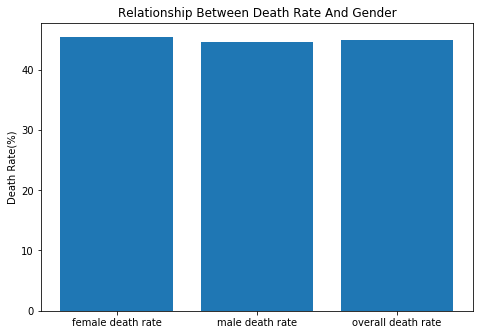

In [61]:
femalerate = 127779/280984*100
malerate = 157444/353725*100
overallrate = 285223/634709*100
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['female death rate', 'male death rate', 'overall death rate']
fractiony = [femalerate, malerate, overallrate]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Relationship Between Death Rate And Gender')
plt.ylabel("Death Rate(%)")
plt.show() 

# death rate for different disease

In [62]:
merged.dtypes

ROW_ID_x          int64
ICD9_CODE        object
SHORT_TITLE_x    object
LONG_TITLE_x     object
group            object
lv.1_code        object
lv.2_code         int64
lv.1_group       object
lv.2_group       object
Unnamed: 0        int64
SUBJECT_ID        int64
HADM_ID           int64
SEQ_NUM           int64
ROW_ID_y          int64
GENDER           object
DOB              object
DOD               int64
DOD_HOSP         object
DOD_SSN          object
EXPIRE_FLAG       int64
dtype: object

In [63]:
#group0 = merged.loc[merged['group']==0]
group1 = merged.loc[merged['group']=='V1']
group1

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
473499,10970,V1869,Fam hx-kidney dis NEC,Family history of other kidney diseases,V1,V10-V19,1018,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain other specific condi...,168802,15119,164611,11,14299,F,3/3/19 0:00,0,NaN,NaN,0
473500,10972,V188,Fm hx-infect/parasit dis,Family history of infectious and parasitic dis...,V1,V10-V19,1018,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain other specific condi...,89391,7975,149660,8,7544,F,12/8/47 0:00,0,NaN,NaN,0
473501,10972,V188,Fm hx-infect/parasit dis,Family history of infectious and parasitic dis...,V1,V10-V19,1018,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain other specific condi...,114537,10210,139547,2,9661,F,6/4/98 0:00,0,NaN,NaN,0
473502,10972,V188,Fm hx-infect/parasit dis,Family history of infectious and parasitic dis...,V1,V10-V19,1018,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain other specific condi...,350780,30537,176949,8,28700,M,8/3/92 0:00,0,NaN,NaN,0
473503,10972,V188,Fm hx-infect/parasit dis,Family history of infectious and parasitic dis...,V1,V10-V19,1018,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain other specific condi...,354232,30778,170099,3,28929,F,9/3/80 0:00,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620432,10124,V1749,Fam hx-cardiovas dis NEC,Family history of other cardiovascular diseases,V1,V10-V19,1017,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain chronic disabling di...,641822,97924,186334,20,45995,M,7/7/48 0:00,0,NaN,NaN,0
620433,10125,V175,Family hx-asthma,Family history of asthma,V1,V10-V19,1017,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain chronic disabling di...,211285,18982,190161,24,17933,F,8/5/69 0:00,1,8/6/39 0:00,8/6/39 0:00,1
620434,10125,V175,Family hx-asthma,Family history of asthma,V1,V10-V19,1017,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain chronic disabling di...,211292,18982,190811,19,17933,F,8/5/69 0:00,1,8/6/39 0:00,8/6/39 0:00,1
620435,10125,V175,Family hx-asthma,Family history of asthma,V1,V10-V19,1017,PERSONS WITH POTENTIAL HEALTH HAZARDS RELATED ...,Family history of certain chronic disabling di...,339533,29660,125319,16,27910,M,8/23/87 0:00,0,NaN,NaN,0


In [64]:
top = merged['group'].value_counts()
top

42    53028
27    40737
41    31396
40    27988
28    23659
      ...  
2        17
66       16
V9        8
6         3
67        2
Name: group, Length: 122, dtype: int64

In [65]:
top10 = top[:11]
top10

42    53028
27    40737
41    31396
40    27988
28    23659
99    22011
78    21318
58    19415
V4    19134
51    19076
V1    18548
Name: group, dtype: int64

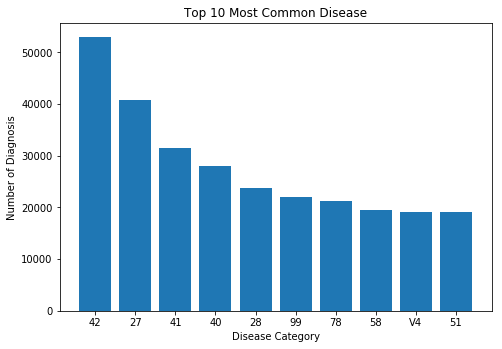

In [66]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['42', '27', '41', '40', '28', '99', '78', '58', 'V4', '51']
#categoryx = ['ARTHROPOD-BORNE VIRAL DISEASES', 'MALIGNANT NEOPLASM', 'MALIGNANT NEOPLASM OF RESPIRATORY SYSTEM', '20', '15']
fractiony = [53028, 40737, 31396, 27988, 23659, 22011, 21318, 19415, 19134, 19076]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Top 10 Most Common Disease')
plt.ylabel("Number of Diagnosis")
plt.xlabel("Disease Category")
plt.show()

In [67]:
#merged['died'] = merged.loc[merged['DOD']==1]
died = merged.loc[merged['DOD']==1]

In [68]:
topdied = died['group'].value_counts()
topdied

42    28562
27    17947
41    13848
40    12408
28    11746
      ...  
66        2
65        2
V9        1
66        1
81        1
Name: group, Length: 121, dtype: int64

In [69]:
mergedtop = pd.merge(top, topdied, how='inner', left_index=True, right_index=True )
#top = top.to_frame()
#topdied = topdied.to_frame()
#mergetop = top.join(topdied)
#mergedtop.head()
mergedtop

,group_x,group_y
42,53028,28562
27,40737,17947
41,31396,13848
40,27988,12408
28,23659,11746
...,...,...
81,24,1
2,17,7
66,16,1
V9,8,1


In [70]:
mergedtop['deathrate'] = mergedtop['group_y']/mergedtop['group_x']
mergedtop= mergedtop.sort_values(by=['deathrate'], ascending=False)
mergedtop

,group_x,group_y,deathrate
6,3,3,1.000000
19,6263,5243,0.837139
16,1260,1009,0.800794
20,1585,1128,0.711672
15,1590,1127,0.708805
...,...,...,...
77,7359,147,0.019976
76,8884,164,0.018460
77,2430,36,0.014815
V3,7766,65,0.008370


In [71]:
mergedtop = mergedtop[:10]
mergedtop

,group_x,group_y,deathrate
6,3,3,1.000000
19,6263,5243,0.837139
16,1260,1009,0.800794
20,1585,1128,0.711672
15,1590,1127,0.708805
14,100,66,0.660000
3,6499,4227,0.650408
70,5111,3288,0.643318
0,1694,1079,0.636954
50,3871,2436,0.629295


In [72]:
group6 = merged.loc[merged['group']==0]
group6

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
17,241,30,Salmonella enteritis,Salmonella gastroenteritis,0,001-009,3,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,307766,27367,136441,7,25820,F,5/26/21 0:00,1,9/29/02 0:00,9/29/02 0:00,1
18,241,30,Salmonella enteritis,Salmonella gastroenteritis,0,001-009,3,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,497329,65733,168926,9,37612,M,1/17/95 0:00,1,1/5/67 0:00,1/5/67 0:00,1
19,242,31,Salmonella septicemia,Salmonella septicemia,0,001-009,3,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,513243,69141,136542,1,38517,M,2/25/19 0:00,0,NaN,NaN,0
20,249,38,Salmonella infection NEC,Other specified salmonella infections,0,001-009,3,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,398509,44437,181557,10,31924,F,12/28/43 0:00,0,NaN,NaN,0
21,249,38,Salmonella infection NEC,Other specified salmonella infections,0,001-009,3,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,579784,83908,180356,3,42351,M,2/13/49 0:00,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,96,92,Infectious diarrhea NOS,Infectious diarrhea,0,001-009,9,INTESTINAL INFECTIOUS DISEASES,Ill-defined intestinal infections,628282,95011,195773,2,45215,F,5/20/33 0:00,0,NaN,NaN,0
1707,97,93,Diarrhea of infect orig,Diarrhea of presumed infectious origin,0,001-009,9,INTESTINAL INFECTIOUS DISEASES,Ill-defined intestinal infections,6778,587,150352,5,554,M,2/20/44 0:00,0,NaN,NaN,0
1708,97,93,Diarrhea of infect orig,Diarrhea of presumed infectious origin,0,001-009,9,INTESTINAL INFECTIOUS DISEASES,Ill-defined intestinal infections,79015,7101,161140,2,6716,M,10/19/99 0:00,1,1/9/64 0:00,1/9/63 0:00,1
1709,97,93,Diarrhea of infect orig,Diarrhea of presumed infectious origin,0,001-009,9,INTESTINAL INFECTIOUS DISEASES,Ill-defined intestinal infections,162942,14574,166534,1,13782,F,5/19/15 0:00,1,NaN,3/4/96 0:00,1


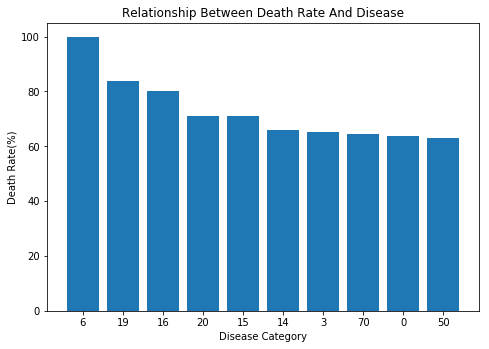

In [73]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['6', '19', '16', '20', '15', '14', '3', '70', '0', '50']
#categoryx = ['ARTHROPOD-BORNE VIRAL DISEASES', 'MALIGNANT NEOPLASM', 'MALIGNANT NEOPLASM OF RESPIRATORY SYSTEM', '20', '15']
fractiony = [100, 83.714, 80.079, 71.167, 70.880, 66.0000, 65.0408, 64.3318, 63.6954, 62.9295]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Relationship Between Death Rate And Disease')
plt.ylabel("Death Rate(%)")
plt.xlabel("Disease Category")
plt.show() 

# Logistic Regression

In [74]:
#seaborn.pairplot(merged)
datamap = merged.copy()

In [75]:
datamap['GENDER'] = datamap['GENDER'].map({'F':0, 'M': 1})
datamap.head()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,581403,84318,188604,5,42458,0,7/17/39 0:00,0,NaN,NaN,0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,137110,12139,148809,3,11489,1,1/24/92 0:00,0,NaN,NaN,0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,236331,21192,140260,8,19998,1,10/17/86 0:00,0,NaN,NaN,0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,437948,52831,106939,3,34186,1,4/18/01 0:00,0,NaN,NaN,0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,459979,57599,180150,4,35441,0,8/24/59 0:00,0,NaN,NaN,0


In [76]:
datamap.dtypes

ROW_ID_x          int64
ICD9_CODE        object
SHORT_TITLE_x    object
LONG_TITLE_x     object
group            object
lv.1_code        object
lv.2_code         int64
lv.1_group       object
lv.2_group       object
Unnamed: 0        int64
SUBJECT_ID        int64
HADM_ID           int64
SEQ_NUM           int64
ROW_ID_y          int64
GENDER            int64
DOB              object
DOD               int64
DOD_HOSP         object
DOD_SSN          object
EXPIRE_FLAG       int64
dtype: object

In [77]:
#group to string

#datamap['group'] = datamap['group'].astype('|S')


#datamap['group'] = datamap['group'].infer_objects()
#datamap['group'] = datamap['group'].astype('str')

#datamap['group'] = datamap['group'].astype(str)
#datamap['group'] = datamap['group'].astype('str')
#datamap['group'] = datamap['group'].to_string()

In [78]:
#datamap['group'] = datamap['group'].str.decode("utf-8")
#datamap.tail(30)

In [79]:
#datamap.loc[datamap['ROW_ID_x']==188]

In [80]:
datamap.tail()

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
634704,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,80739,7241,127440,18,6852,1,9/13/39 0:00,0,NaN,NaN,0
634705,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,463237,58247,159012,28,35621,0,2/2/87 0:00,1,NaN,12/27/58 0:00,1
634706,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,488857,63866,108244,9,37112,1,9/30/45 0:00,0,NaN,NaN,0
634707,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,503431,67050,118850,16,37957,1,8/27/43 0:00,1,2/21/00 0:00,2/21/00 0:00,1
634708,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis,V7,V70-V82,1074,PERSONS WITHOUT REPORTED DIAGNOSIS ENCOUNTERED...,Special screening examination for bacterial an...,562956,80344,102906,29,41382,1,1/29/61 0:00,0,NaN,NaN,0


In [81]:
datamap = datamap[datamap['group'].notna()]
datamap.head(30)

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,188,1186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,581403,84318,188604,5,42458,0,7/17/39 0:00,0,NaN,NaN,0
1,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,137110,12139,148809,3,11489,1,1/24/92 0:00,0,NaN,NaN,0
2,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,236331,21192,140260,8,19998,1,10/17/86 0:00,0,NaN,NaN,0
3,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,437948,52831,106939,3,34186,1,4/18/01 0:00,0,NaN,NaN,0
4,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,459979,57599,180150,4,35441,0,8/24/59 0:00,0,NaN,NaN,0
5,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,465492,58702,114246,18,35752,0,11/17/61 0:00,1,12/6/14 0:00,12/6/14 0:00,1
6,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,512387,68946,182954,9,38472,1,1854-03-20 00:00:00,1,9/19/54 0:00,9/19/54 0:00,1
7,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,589168,86226,106915,2,42918,1,12/29/64 0:00,0,NaN,NaN,0
8,189,1190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,604333,89840,186211,9,43862,1,6/25/10 0:00,1,10/27/92 0:00,10/27/92 0:00,1
9,192,1193,Pulmon TB NOS-micro dx,"Pulmonary tuberculosis, unspecified, tubercle ...",1,010-018,11,TUBERCULOSIS,Pulmonary tuberculosis,250894,22532,167853,1,21265,0,8/20/64 0:00,0,NaN,NaN,0


#groups to int
#only numeric columns 
datamap['group'] = datamap['group'].str.replace('V','10',regex=True)
datamap['group'] = datamap['group'].str.replace('E','11',regex=True)

#datamap['group'] = datamap['group'].astype(np.int)
datamap['group'] = datamap['group'].astype(np.float)
datamap.head(30)


In [82]:
#datamap = datamap.dropna()
#datamap = datamap[datamap['group'].notna()]
#datamap.head(30)

In [83]:
#datamap.loc[datamap['group']==15]

In [84]:
datamap['group'] = datamap['group'].astype('str')

In [85]:
datamap['DOD']

0         0
1         0
2         0
3         0
4         0
         ..
634704    0
634705    1
634706    0
634707    1
634708    0
Name: DOD, Length: 634709, dtype: int64

# regroup 19 clusters

In [86]:
#datamap['group'] = datamap['group'].astype('|S')
#datamap['group'] = datamap['group'].astype('str')

#icd_grouped['group'] = list(map(lambda x: x[0:2], list(icd_grouped['ICD9_CODE'])))

In [95]:
group2 = grouped['group2']
group2

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
634704    18.0
634705    18.0
634706    18.0
634707    18.0
634708    18.0
Name: group2, Length: 634709, dtype: float64

In [96]:
# binary variable for each g2 

arr1= []

for i in range(634709):
    if  group2.iloc[i]==1:
        arr1.append(1)
        
    else:
        arr1.append(0)

grouped['bg1'] = arr1

grouped.head()

        
#df.iloc[3,4] 3rd row, 4th column


,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1
0,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,27367.0,136441.0,F,5/26/21 0:00,1.0,9/29/02 0:00,1
1,241.0,30,Salmonella enteritis,Salmonella gastroenteritis,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,65733.0,168926.0,M,1/17/95 0:00,1.0,1/5/67 0:00,1
2,242.0,31,Salmonella septicemia,Salmonella septicemia,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,69141.0,136542.0,M,2/25/19 0:00,0.0,NaN,1
3,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,44437.0,181557.0,F,12/28/43 0:00,0.0,NaN,1
4,249.0,38,Salmonella infection NEC,Other specified salmonella infections,0,1.0,001-009,3.0,INTESTINAL INFECTIOUS DISEASES,Other salmonella infections,83908.0,180356.0,M,2/13/49 0:00,0.0,NaN,1


In [97]:
arr2= []

for i in range(634709):
    if  group2.iloc[i]==2:
        arr2.append(1)
        
    else:
        arr2.append(0)

grouped['bg2'] = arr2
grouped.head()

#grouped.loc[grouped['group2']==2]
# bg2 = 1 if group2 is 2 o/w 0

In [99]:
#merged2.iloc[40000:40050]
grouped.loc[grouped['group2']==2]


,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2
19322,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,1755.0,133138.0,F,6/8/35 0:00,0.0,NaN,0,1
19323,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,15470.0,112280.0,F,10/6/58 0:00,1.0,1/12/45 0:00,0,1
19324,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,65824.0,194922.0,M,11/29/49 0:00,1.0,1/31/34 0:00,0,1
19325,1141.0,1419,Malig neo tongue NOS,"Malignant neoplasm of tongue, unspecified",14,2.0,140-149,141.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of tongue,74686.0,130450.0,M,3/14/90 0:00,1.0,1/16/56 0:00,0,1
19326,1142.0,1420,Malig neo parotid,Malignant neoplasm of parotid gland,14,2.0,140-149,142.0,"MALIGNANT NEOPLASM OF LIP, ORAL CAVITY, AND PH...",Malignant neoplasm of major salivary glands,4800.0,106976.0,M,3/5/49 0:00,0.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33356,2571.0,2354,Unc behav neo peritoneum,Neoplasm of uncertain behavior of retroperiton...,23,2.0,0,0.0,Not Found,Not Found,31217.0,119143.0,M,8/12/66 0:00,0.0,NaN,0,1
33357,2571.0,2354,Unc behav neo peritoneum,Neoplasm of uncertain behavior of retroperiton...,23,2.0,0,0.0,Not Found,Not Found,49853.0,179842.0,M,1/6/89 0:00,0.0,NaN,0,1
33358,2571.0,2354,Unc behav neo peritoneum,Neoplasm of uncertain behavior of retroperiton...,23,2.0,0,0.0,Not Found,Not Found,63073.0,134830.0,M,12/18/23 0:00,0.0,NaN,0,1
132034,2693.0,30285,"Gend iden dis,adol/adult",Gender identity disorder in adolescents or adults,30,2.0,300-316,302.0,"NEUROTIC DISORDERS, PERSONALITY DISORDERS, AND...",Sexual and gender identity disorders,43459.0,178442.0,F,11/11/00 0:00,0.0,NaN,0,1


In [101]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==3:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg3'] = arr
#grouped.head()

grouped.loc[grouped['group2']==3]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2,bg3
33359,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,671.0,126769.0,M,3/27/48 0:00,0.0,NaN,0,0,1
33360,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,2814.0,127288.0,F,9/24/62 0:00,0.0,NaN,0,0,1
33361,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,4290.0,155880.0,F,8/26/86 0:00,1.0,10/18/17 0:00,0,0,1
33362,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,5664.0,136159.0,F,11/6/48 0:00,0.0,NaN,0,0,1
33363,1775.0,2409,Goiter NOS,"Goiter, unspecified",24,3.0,240-246,240.0,DISORDERS OF THYROID GLAND,Simple and unspecified goiter,5911.0,190921.0,M,7/11/93 0:00,1.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100483,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,23707.0,186045.0,F,4/12/92 0:00,0.0,NaN,0,0,1
100484,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,51844.0,135757.0,M,7/13/91 0:00,0.0,NaN,0,0,1
100485,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,53650.0,184951.0,F,9/3/72 0:00,1.0,1/5/29 0:00,0,0,1
100486,2216.0,2798,Immune mechanism dis NEC,Other specified disorders involving the immune...,27,3.0,270-279,279.0,OTHER METABOLIC AND IMMUNITY DISORDERS,Disorders involving the immune mechanism,53650.0,138141.0,F,9/3/72 0:00,1.0,1/5/29 0:00,0,0,1


In [102]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==4:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg4'] = arr
#grouped.head()

grouped.loc[grouped['group2']==4]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,SUBJECT_ID,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2,bg3,bg4
100488,3129.0,2832,Hemolytic hemoglobinuria,Hemoglobinuria due to hemolysis from external ...,28,4.0,280-289,283.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Acquired hemolytic anemias,2496.0,123307.0,M,10/26/84 0:00,0.0,NaN,0,0,0,1
100489,3129.0,2832,Hemolytic hemoglobinuria,Hemoglobinuria due to hemolysis from external ...,28,4.0,280-289,283.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Acquired hemolytic anemias,17190.0,186387.0,M,12/2/45 0:00,0.0,NaN,0,0,0,1
100490,3129.0,2832,Hemolytic hemoglobinuria,Hemoglobinuria due to hemolysis from external ...,28,4.0,280-289,283.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Acquired hemolytic anemias,29612.0,186491.0,F,8/28/76 0:00,0.0,NaN,0,0,0,1
100491,3129.0,2832,Hemolytic hemoglobinuria,Hemoglobinuria due to hemolysis from external ...,28,4.0,280-289,283.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Acquired hemolytic anemias,30668.0,160603.0,F,5/12/12 0:00,1.0,NaN,0,0,0,1
100492,3129.0,2832,Hemolytic hemoglobinuria,Hemoglobinuria due to hemolysis from external ...,28,4.0,280-289,283.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Acquired hemolytic anemias,41350.0,115407.0,M,1/27/73 0:00,0.0,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124143,3212.0,2899,Blood disease NOS,Unspecified diseases of blood and blood-formin...,28,4.0,280-289,289.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Other diseases of blood and blood-forming organs,49392.0,145431.0,F,8/29/72 0:00,0.0,NaN,0,0,0,1
124144,3212.0,2899,Blood disease NOS,Unspecified diseases of blood and blood-formin...,28,4.0,280-289,289.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Other diseases of blood and blood-forming organs,51933.0,157806.0,M,5/3/36 0:00,0.0,NaN,0,0,0,1
124145,3212.0,2899,Blood disease NOS,Unspecified diseases of blood and blood-formin...,28,4.0,280-289,289.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Other diseases of blood and blood-forming organs,53939.0,131768.0,M,2/1/58 0:00,1.0,6/25/40 0:00,0,0,0,1
124146,3212.0,2899,Blood disease NOS,Unspecified diseases of blood and blood-formin...,28,4.0,280-289,289.0,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,Other diseases of blood and blood-forming organs,57293.0,161416.0,M,2/4/08 0:00,1.0,1/1/90 0:00,0,0,0,1


In [103]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==5:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg5'] = arr
#grouped.head()

grouped.loc[grouped['group2']==5]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,HADM_ID,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2,bg3,bg4,bg5
124147,2572.0,29634,Rec depr psych-psychotic,"Major depressive affective disorder, recurrent...",29,5.0,290-299,296.0,PSYCHOSES,Episodic mood disorders,...,100956.0,F,12/21/67 0:00,0.0,NaN,0,0,0,0,1
124148,2572.0,29634,Rec depr psych-psychotic,"Major depressive affective disorder, recurrent...",29,5.0,290-299,296.0,PSYCHOSES,Episodic mood disorders,...,192229.0,F,3/29/04 0:00,0.0,NaN,0,0,0,0,1
124149,2572.0,29634,Rec depr psych-psychotic,"Major depressive affective disorder, recurrent...",29,5.0,290-299,296.0,PSYCHOSES,Episodic mood disorders,...,114379.0,M,9/24/06 0:00,1.0,10/22/71 0:00,0,0,0,0,1
124150,2572.0,29634,Rec depr psych-psychotic,"Major depressive affective disorder, recurrent...",29,5.0,290-299,296.0,PSYCHOSES,Episodic mood disorders,...,105760.0,F,10/14/34 0:00,0.0,NaN,0,0,0,0,1
124151,2572.0,29634,Rec depr psych-psychotic,"Major depressive affective disorder, recurrent...",29,5.0,290-299,296.0,PSYCHOSES,Episodic mood disorders,...,100017.0,M,11/10/75 0:00,0.0,NaN,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149016,3064.0,319,Intellect disability NOS,Unspecified intellectual disabilities,31,5.0,317-319,319.0,MENTAL RETARDATION,Unspecified mental retardation,...,137417.0,M,6/29/02 0:00,1.0,11/20/77 0:00,0,0,0,0,1
149017,3064.0,319,Intellect disability NOS,Unspecified intellectual disabilities,31,5.0,317-319,319.0,MENTAL RETARDATION,Unspecified mental retardation,...,139178.0,F,1/15/04 0:00,1.0,NaN,0,0,0,0,1
149018,3064.0,319,Intellect disability NOS,Unspecified intellectual disabilities,31,5.0,317-319,319.0,MENTAL RETARDATION,Unspecified mental retardation,...,175223.0,M,6/7/92 0:00,0.0,NaN,0,0,0,0,1
149019,3064.0,319,Intellect disability NOS,Unspecified intellectual disabilities,31,5.0,317-319,319.0,MENTAL RETARDATION,Unspecified mental retardation,...,182472.0,F,1/21/19 0:00,0.0,NaN,0,0,0,0,1


In [104]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==6:
        arr.append(1)        
    else:
        arr.append(0)

grouped['bg6'] = arr
#grouped.head()

grouped.loc[grouped['group2']==6]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,GENDER,DOB,DOD,DOD_HOSP,bg1,bg2,bg3,bg4,bg5,bg6
149021,3065.0,3200,Hemophilus meningitis,Hemophilus meningitis,32,6.0,320-326,320.0,INFLAMMATORY DISEASES OF THE CENTRAL NERVOUS S...,Bacterial meningitis,...,F,10/8/26 0:00,0.0,NaN,0,0,0,0,0,1
149022,3065.0,3200,Hemophilus meningitis,Hemophilus meningitis,32,6.0,320-326,320.0,INFLAMMATORY DISEASES OF THE CENTRAL NERVOUS S...,Bacterial meningitis,...,F,6/22/43 0:00,0.0,NaN,0,0,0,0,0,1
149023,3066.0,3201,Pneumococcal meningitis,Pneumococcal meningitis,32,6.0,320-326,320.0,INFLAMMATORY DISEASES OF THE CENTRAL NERVOUS S...,Bacterial meningitis,...,M,10/20/15 0:00,0.0,NaN,0,0,0,0,0,1
149024,3066.0,3201,Pneumococcal meningitis,Pneumococcal meningitis,32,6.0,320-326,320.0,INFLAMMATORY DISEASES OF THE CENTRAL NERVOUS S...,Bacterial meningitis,...,M,1/27/26 0:00,1.0,4/18/86 0:00,0,0,0,0,0,1
149025,3066.0,3201,Pneumococcal meningitis,Pneumococcal meningitis,32,6.0,320-326,320.0,INFLAMMATORY DISEASES OF THE CENTRAL NERVOUS S...,Bacterial meningitis,...,F,6/9/54 0:00,0.0,NaN,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172135,4637.0,38918,"Sensonrl hear loss,bilat","Sensorineural hearing loss, bilateral",38,6.0,380-389,389.0,DISEASES OF THE EAR AND MASTOID PROCESS,Hearing loss,...,M,6/25/80 0:00,0.0,NaN,0,0,0,0,0,1
172136,4639.0,38921,"Mixed hearing loss,unilt","Mixed hearing loss, unilateral",38,6.0,380-389,389.0,DISEASES OF THE EAR AND MASTOID PROCESS,Hearing loss,...,M,9/15/26 0:00,0.0,NaN,0,0,0,0,0,1
172137,4640.0,38922,"Mixed hearing loss,bilat","Mixed hearing loss, bilateral",38,6.0,380-389,389.0,DISEASES OF THE EAR AND MASTOID PROCESS,Hearing loss,...,M,6/1/55 0:00,1.0,NaN,0,0,0,0,0,1
172138,4640.0,38922,"Mixed hearing loss,bilat","Mixed hearing loss, bilateral",38,6.0,380-389,389.0,DISEASES OF THE EAR AND MASTOID PROCESS,Hearing loss,...,F,10/6/39 0:00,0.0,NaN,0,0,0,0,0,1


In [105]:
arr= []

for i in range(634709):
    if  group2.iloc[i]==7:
        arr.append(1)
        
    else:
        arr.append(0)

grouped['bg7'] = arr
#grouped.head()

grouped.loc[grouped['group2']==7]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,DOB,DOD,DOD_HOSP,bg1,bg2,bg3,bg4,bg5,bg6,bg7
172140,4299.0,39890,Rheumatic heart dis NOS,"Rheumatic heart disease, unspecified",39,7.0,393-398,398.0,CHRONIC RHEUMATIC HEART DISEASE,Other rheumatic heart disease,...,4/27/02 0:00,0.0,NaN,0,0,0,0,0,0,1
172141,4299.0,39890,Rheumatic heart dis NOS,"Rheumatic heart disease, unspecified",39,7.0,393-398,398.0,CHRONIC RHEUMATIC HEART DISEASE,Other rheumatic heart disease,...,3/27/24 0:00,0.0,NaN,0,0,0,0,0,0,1
172142,4299.0,39890,Rheumatic heart dis NOS,"Rheumatic heart disease, unspecified",39,7.0,393-398,398.0,CHRONIC RHEUMATIC HEART DISEASE,Other rheumatic heart disease,...,1/2/20 0:00,1.0,11/5/86 0:00,0,0,0,0,0,0,1
172143,4299.0,39890,Rheumatic heart dis NOS,"Rheumatic heart disease, unspecified",39,7.0,393-398,398.0,CHRONIC RHEUMATIC HEART DISEASE,Other rheumatic heart disease,...,4/3/34 0:00,0.0,NaN,0,0,0,0,0,0,1
172144,4299.0,39890,Rheumatic heart dis NOS,"Rheumatic heart disease, unspecified",39,7.0,393-398,398.0,CHRONIC RHEUMATIC HEART DISEASE,Other rheumatic heart disease,...,12/23/28 0:00,0.0,NaN,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311330,5411.0,4599,Circulatory disease NOS,Unspecified circulatory system disorder,45,7.0,451-459,459.0,"DISEASES OF VEINS AND LYMPHATICS, AND OTHER DI...",Other disorders of circulatory system,...,1876-08-22 00:00:00,0.0,NaN,0,0,0,0,0,0,1
311331,5411.0,4599,Circulatory disease NOS,Unspecified circulatory system disorder,45,7.0,451-459,459.0,"DISEASES OF VEINS AND LYMPHATICS, AND OTHER DI...",Other disorders of circulatory system,...,1/15/00 0:00,0.0,NaN,0,0,0,0,0,0,1
311332,5411.0,4599,Circulatory disease NOS,Unspecified circulatory system disorder,45,7.0,451-459,459.0,"DISEASES OF VEINS AND LYMPHATICS, AND OTHER DI...",Other disorders of circulatory system,...,2/28/85 0:00,1.0,NaN,0,0,0,0,0,0,1
311333,5411.0,4599,Circulatory disease NOS,Unspecified circulatory system disorder,45,7.0,451-459,459.0,"DISEASES OF VEINS AND LYMPHATICS, AND OTHER DI...",Other disorders of circulatory system,...,3/30/04 0:00,1.0,3/14/90 0:00,0,0,0,0,0,0,1


In [106]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==8:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg8'] = arr
#grouped.head()
grouped.loc[grouped['group2']==8]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,DOD,DOD_HOSP,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8
311336,5412.0,460,Acute nasopharyngitis,Acute nasopharyngitis [common cold],46,8.0,460-466,460.0,ACUTE RESPIRATORY INFECTIONS,Acute nasopharyngitis [common cold],...,0.0,NaN,0,0,0,0,0,0,0,1
311337,5413.0,4610,Ac maxillary sinusitis,Acute maxillary sinusitis,46,8.0,460-466,461.0,ACUTE RESPIRATORY INFECTIONS,Acute sinusitis,...,1.0,NaN,0,0,0,0,0,0,0,1
311338,5413.0,4610,Ac maxillary sinusitis,Acute maxillary sinusitis,46,8.0,460-466,461.0,ACUTE RESPIRATORY INFECTIONS,Acute sinusitis,...,0.0,NaN,0,0,0,0,0,0,0,1
311339,5413.0,4610,Ac maxillary sinusitis,Acute maxillary sinusitis,46,8.0,460-466,461.0,ACUTE RESPIRATORY INFECTIONS,Acute sinusitis,...,1.0,2/7/91 0:00,0,0,0,0,0,0,0,1
311340,5413.0,4610,Ac maxillary sinusitis,Acute maxillary sinusitis,46,8.0,460-466,461.0,ACUTE RESPIRATORY INFECTIONS,Acute sinusitis,...,1.0,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353760,5294.0,5199,Resp system disease NOS,Unspecified disease of respiratory system,51,8.0,510-519,519.0,OTHER DISEASES OF RESPIRATORY SYSTEM,Other diseases of respiratory system,...,0.0,NaN,0,0,0,0,0,0,0,1
353761,5294.0,5199,Resp system disease NOS,Unspecified disease of respiratory system,51,8.0,510-519,519.0,OTHER DISEASES OF RESPIRATORY SYSTEM,Other diseases of respiratory system,...,1.0,12/22/15 0:00,0,0,0,0,0,0,0,1
353762,5294.0,5199,Resp system disease NOS,Unspecified disease of respiratory system,51,8.0,510-519,519.0,OTHER DISEASES OF RESPIRATORY SYSTEM,Other diseases of respiratory system,...,0.0,NaN,0,0,0,0,0,0,0,1
353763,5294.0,5199,Resp system disease NOS,Unspecified disease of respiratory system,51,8.0,510-519,519.0,OTHER DISEASES OF RESPIRATORY SYSTEM,Other diseases of respiratory system,...,1.0,1/20/87 0:00,0,0,0,0,0,0,0,1


In [107]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==9:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg9'] = arr
#grouped.head()
grouped.loc[grouped['group2']==9]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,DOD_HOSP,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9
353765,5012.0,52469,Other specf TMJ disordrs,Other specified temporomandibular joint disorders,52,9.0,520-529,524.0,"DISEASES OF ORAL CAVITY, SALIVARY GLANDS, AND ...","Dentofacial anomalies, including malocclusion",...,NaN,0,0,0,0,0,0,0,0,1
353766,5012.0,52469,Other specf TMJ disordrs,Other specified temporomandibular joint disorders,52,9.0,520-529,524.0,"DISEASES OF ORAL CAVITY, SALIVARY GLANDS, AND ...","Dentofacial anomalies, including malocclusion",...,7/8/02 0:00,0,0,0,0,0,0,0,0,1
353767,5023.0,52489,Dentofacial anomaly NEC,Other specified dentofacial anomalies,52,9.0,520-529,524.0,"DISEASES OF ORAL CAVITY, SALIVARY GLANDS, AND ...","Dentofacial anomalies, including malocclusion",...,NaN,0,0,0,0,0,0,0,0,1
353768,5026.0,52510,Acq absence of teeth NOS,"Acquired absence of teeth, unspecified",52,9.0,520-529,525.0,"DISEASES OF ORAL CAVITY, SALIVARY GLANDS, AND ...",Other diseases and conditions of the teeth and...,...,NaN,0,0,0,0,0,0,0,0,1
353769,5026.0,52510,Acq absence of teeth NOS,"Acquired absence of teeth, unspecified",52,9.0,520-529,525.0,"DISEASES OF ORAL CAVITY, SALIVARY GLANDS, AND ...",Other diseases and conditions of the teeth and...,...,2/15/16 0:00,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391975,5875.0,5799,Intest malabsorption NOS,Unspecified intestinal malabsorption,57,9.0,570-579,579.0,OTHER DISEASES OF DIGESTIVE SYSTEM,Intestinal malabsorption,...,NaN,0,0,0,0,0,0,0,0,1
391976,5875.0,5799,Intest malabsorption NOS,Unspecified intestinal malabsorption,57,9.0,570-579,579.0,OTHER DISEASES OF DIGESTIVE SYSTEM,Intestinal malabsorption,...,NaN,0,0,0,0,0,0,0,0,1
391977,5875.0,5799,Intest malabsorption NOS,Unspecified intestinal malabsorption,57,9.0,570-579,579.0,OTHER DISEASES OF DIGESTIVE SYSTEM,Intestinal malabsorption,...,NaN,0,0,0,0,0,0,0,0,1
391978,5875.0,5799,Intest malabsorption NOS,Unspecified intestinal malabsorption,57,9.0,570-579,579.0,OTHER DISEASES OF DIGESTIVE SYSTEM,Intestinal malabsorption,...,NaN,0,0,0,0,0,0,0,0,1


In [108]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==10:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg10'] = arr
#grouped.head()
grouped.loc[grouped['group2']==10]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10
391980,5876.0,5800,Ac proliferat nephritis,Acute glomerulonephritis with lesion of prolif...,58,10.0,580-589,580.0,"NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS",Acute glomerulonephritis,...,0,0,0,0,0,0,0,0,0,1
391981,5876.0,5800,Ac proliferat nephritis,Acute glomerulonephritis with lesion of prolif...,58,10.0,580-589,580.0,"NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS",Acute glomerulonephritis,...,0,0,0,0,0,0,0,0,0,1
391982,5877.0,5804,Ac rapidly progr nephrit,Acute glomerulonephritis with lesion of rapidl...,58,10.0,580-589,580.0,"NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS",Acute glomerulonephritis,...,0,0,0,0,0,0,0,0,0,1
391983,5877.0,5804,Ac rapidly progr nephrit,Acute glomerulonephritis with lesion of rapidl...,58,10.0,580-589,580.0,"NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS",Acute glomerulonephritis,...,0,0,0,0,0,0,0,0,0,1
391984,5878.0,58081,Ac nephritis in oth dis,Acute glomerulonephritis in diseases classifie...,58,10.0,580-589,580.0,"NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS",Acute glomerulonephritis,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423888,5781.0,6289,Female infertility NOS,"Infertility, female, of unspecified origin",62,10.0,617-629,628.0,OTHER DISORDERS OF FEMALE GENITAL TRACT,"Infertility, female",...,0,0,0,0,0,0,0,0,0,1
423889,5781.0,6289,Female infertility NOS,"Infertility, female, of unspecified origin",62,10.0,617-629,628.0,OTHER DISORDERS OF FEMALE GENITAL TRACT,"Infertility, female",...,0,0,0,0,0,0,0,0,0,1
423890,5791.0,62981,Rec preg loss wo cur prg,Recurrent pregnancy loss without current pregn...,62,10.0,617-629,629.0,OTHER DISORDERS OF FEMALE GENITAL TRACT,Other disorders of female genital organs,...,0,0,0,0,0,0,0,0,0,1
423891,5792.0,62989,Female genital disor NEC,Other specified disorders of female genital or...,62,10.0,617-629,629.0,OTHER DISORDERS OF FEMALE GENITAL TRACT,Other disorders of female genital organs,...,0,0,0,0,0,0,0,0,0,1


In [109]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==11:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg11'] = arr
#grouped.head()
grouped.loc[grouped['group2']==11]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11
423893,5665.0,63310,Tubal preg w/o intra prg,Tubal pregnancy without intrauterine pregnancy,63,11.0,630-633,633.0,ECTOPIC AND MOLAR PREGNANCY,Ectopic pregnancy,...,0,0,0,0,0,0,0,0,0,1
423894,5666.0,63311,Tubal preg w intra preg,Tubal pregnancy with intrauterine pregnancy,63,11.0,630-633,633.0,ECTOPIC AND MOLAR PREGNANCY,Ectopic pregnancy,...,0,0,0,0,0,0,0,0,0,1
423895,5667.0,63320,Ovarn preg w/o intra prg,Ovarian pregnancy without intrauterine pregnancy,63,11.0,630-633,633.0,ECTOPIC AND MOLAR PREGNANCY,Ectopic pregnancy,...,0,0,0,0,0,0,0,0,0,1
423896,5669.0,63380,Ect preg NEC w/o int prg,Other ectopic pregnancy without intrauterine p...,63,11.0,630-633,633.0,ECTOPIC AND MOLAR PREGNANCY,Ectopic pregnancy,...,0,0,0,0,0,0,0,0,0,1
423897,5670.0,63381,Ectpc prg NEC w int preg,Other ectopic pregnancy with intrauterine preg...,63,11.0,630-633,633.0,ECTOPIC AND MOLAR PREGNANCY,Ectopic pregnancy,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424542,13560.0,67004,Major puerp inf NOS-p/p,"Major puerperal infection, postpartum conditio...",67,11.0,670-677,670.0,COMPLICATIONS OF THE PUERPERIUM,Major puerperal infection,...,0,0,0,0,0,0,0,0,0,1
424543,13562.0,67012,Puerp endomet del w p/p,"Puerperal endometritis, delivered, with mentio...",67,11.0,670-677,670.0,COMPLICATIONS OF THE PUERPERIUM,Major puerperal infection,...,0,0,0,0,0,0,0,0,0,1
424544,13562.0,67012,Puerp endomet del w p/p,"Puerperal endometritis, delivered, with mentio...",67,11.0,670-677,670.0,COMPLICATIONS OF THE PUERPERIUM,Major puerperal infection,...,0,0,0,0,0,0,0,0,0,1
424545,13563.0,67014,Puerp endomet-postpart,"Puerperal endometritis, postpartum condition o...",67,11.0,670-677,670.0,COMPLICATIONS OF THE PUERPERIUM,Major puerperal infection,...,0,0,0,0,0,0,0,0,0,1


In [110]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==12:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg12'] = arr
#grouped.head()
grouped.loc[grouped['group2']==12]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12
424547,7263.0,6802,Carbuncle of trunk,Carbuncle and furuncle of trunk,68,12.0,680-686,680.0,INFECTIONS OF SKIN AND SUBCUTANEOUS TISSUE,Carbuncle and furuncle,...,0,0,0,0,0,0,0,0,0,1
424548,7263.0,6802,Carbuncle of trunk,Carbuncle and furuncle of trunk,68,12.0,680-686,680.0,INFECTIONS OF SKIN AND SUBCUTANEOUS TISSUE,Carbuncle and furuncle,...,0,0,0,0,0,0,0,0,0,1
424549,7263.0,6802,Carbuncle of trunk,Carbuncle and furuncle of trunk,68,12.0,680-686,680.0,INFECTIONS OF SKIN AND SUBCUTANEOUS TISSUE,Carbuncle and furuncle,...,0,0,0,0,0,0,0,0,0,1
424550,7263.0,6802,Carbuncle of trunk,Carbuncle and furuncle of trunk,68,12.0,680-686,680.0,INFECTIONS OF SKIN AND SUBCUTANEOUS TISSUE,Carbuncle and furuncle,...,0,0,0,0,0,0,0,0,0,1
424551,7266.0,6805,Carbuncle of buttock,Carbuncle and furuncle of buttock,68,12.0,680-686,680.0,INFECTIONS OF SKIN AND SUBCUTANEOUS TISSUE,Carbuncle and furuncle,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433043,8150.0,7099,Skin disorder NOS,Unspecified disorder of skin and subcutaneous ...,70,12.0,700-709,709.0,OTHER DISEASES OF SKIN AND SUBCUTANEOUS TISSUE,Other disorders of skin and subcutaneous tissue,...,0,0,0,0,0,0,0,0,0,1
433044,8150.0,7099,Skin disorder NOS,Unspecified disorder of skin and subcutaneous ...,70,12.0,700-709,709.0,OTHER DISEASES OF SKIN AND SUBCUTANEOUS TISSUE,Other disorders of skin and subcutaneous tissue,...,0,0,0,0,0,0,0,0,0,1
433045,8150.0,7099,Skin disorder NOS,Unspecified disorder of skin and subcutaneous ...,70,12.0,700-709,709.0,OTHER DISEASES OF SKIN AND SUBCUTANEOUS TISSUE,Other disorders of skin and subcutaneous tissue,...,0,0,0,0,0,0,0,0,0,1
433046,8150.0,7099,Skin disorder NOS,Unspecified disorder of skin and subcutaneous ...,70,12.0,700-709,709.0,OTHER DISEASES OF SKIN AND SUBCUTANEOUS TISSUE,Other disorders of skin and subcutaneous tissue,...,0,0,0,0,0,0,0,0,0,1


In [111]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==13:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg13'] = arr
#grouped.head()
grouped.loc[grouped['group2']==13]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13
433048,7844.0,71155,Viral arthritis-pelvis,Arthropathy associated with other viral diseas...,71,13.0,710-719,711.0,ARTHROPATHIES AND RELATED DISORDERS,Arthropathy associated with infections,...,0,0,0,0,0,0,0,0,0,1
433049,7869.0,71180,Inf arthritis NEC-unspec,Arthropathy associated with other infectious a...,71,13.0,710-719,711.0,ARTHROPATHIES AND RELATED DISORDERS,Arthropathy associated with infections,...,0,0,0,0,0,0,0,0,0,1
433050,8151.0,7100,Syst lupus erythematosus,Systemic lupus erythematosus,71,13.0,710-719,710.0,ARTHROPATHIES AND RELATED DISORDERS,Diffuse diseases of connective tissue,...,0,0,0,0,0,0,0,0,0,1
433051,8151.0,7100,Syst lupus erythematosus,Systemic lupus erythematosus,71,13.0,710-719,710.0,ARTHROPATHIES AND RELATED DISORDERS,Diffuse diseases of connective tissue,...,0,0,0,0,0,0,0,0,0,1
433052,8151.0,7100,Syst lupus erythematosus,Systemic lupus erythematosus,71,13.0,710-719,710.0,ARTHROPATHIES AND RELATED DISORDERS,Diffuse diseases of connective tissue,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446416,10917.0,7385,Other acq back deformity,Other acquired deformity of back or spine,73,13.0,730-739,738.0,"OSTEOPATHIES, CHONDROPATHIES, AND ACQUIRED MUS...",Other acquired deformity,...,0,0,0,0,0,0,0,0,0,1
446417,10917.0,7385,Other acq back deformity,Other acquired deformity of back or spine,73,13.0,730-739,738.0,"OSTEOPATHIES, CHONDROPATHIES, AND ACQUIRED MUS...",Other acquired deformity,...,0,0,0,0,0,0,0,0,0,1
446418,10918.0,7386,Acq pelvic deformity,Acquired deformity of pelvis,73,13.0,730-739,738.0,"OSTEOPATHIES, CHONDROPATHIES, AND ACQUIRED MUS...",Other acquired deformity,...,0,0,0,0,0,0,0,0,0,1
446419,10920.0,7388,Acq deformity NEC,Acquired deformity of other specified site,73,13.0,730-739,738.0,"OSTEOPATHIES, CHONDROPATHIES, AND ACQUIRED MUS...",Other acquired deformity,...,0,0,0,0,0,0,0,0,0,1


In [112]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==14:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg14'] = arr
#grouped.head()
grouped.loc[grouped['group2']==14]

,ROW_ID_x,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,group2,lv.1_code,lv.2_code,lv.1_group,lv.2_group,...,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14
446421,7546.0,74912,Unilat cleft lip-imcompl,"Cleft lip, unilateral, incomplete",74,14.0,740-759,749.0,CONGENITAL ANOMALIES,Cleft palate and cleft lip,...,0,0,0,0,0,0,0,0,0,1
446422,7549.0,74920,Cleft palate & lip NOS,"Cleft palate with cleft lip, unspecified",74,14.0,740-759,749.0,CONGENITAL ANOMALIES,Cleft palate and cleft lip,...,0,0,0,0,0,0,0,0,0,1
446423,7549.0,74920,Cleft palate & lip NOS,"Cleft palate with cleft lip, unspecified",74,14.0,740-759,749.0,CONGENITAL ANOMALIES,Cleft palate and cleft lip,...,0,0,0,0,0,0,0,0,0,1
446424,7549.0,74920,Cleft palate & lip NOS,"Cleft palate with cleft lip, unspecified",74,14.0,740-759,749.0,CONGENITAL ANOMALIES,Cleft palate and cleft lip,...,0,0,0,0,0,0,0,0,0,1
446425,7549.0,74920,Cleft palate & lip NOS,"Cleft palate with cleft lip, unspecified",74,14.0,740-759,749.0,CONGENITAL ANOMALIES,Cleft palate and cleft lip,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450375,8266.0,7596,Hamartoses NEC,"Other hamartoses, not elsewhere classified",75,14.0,740-759,759.0,CONGENITAL ANOMALIES,Other and unspecified congenital anomalies,...,0,0,0,0,0,0,0,0,0,1
450376,8266.0,7596,Hamartoses NEC,"Other hamartoses, not elsewhere classified",75,14.0,740-759,759.0,CONGENITAL ANOMALIES,Other and unspecified congenital anomalies,...,0,0,0,0,0,0,0,0,0,1
450377,8266.0,7596,Hamartoses NEC,"Other hamartoses, not elsewhere classified",75,14.0,740-759,759.0,CONGENITAL ANOMALIES,Other and unspecified congenital anomalies,...,0,0,0,0,0,0,0,0,0,1
450378,8266.0,7596,Hamartoses NEC,"Other hamartoses, not elsewhere classified",75,14.0,740-759,759.0,CONGENITAL ANOMALIES,Other and unspecified congenital anomalies,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
arr= []
for i in range(634709):
    if  group2.iloc[i]==15:
        arr.append(1) 
    else:
        arr.append(0)

grouped['bg8'] = arr
#grouped.head()
grouped.loc[grouped['group2']==8]

In [303]:
y = datamap['DOD']
features = ['ROW_ID_x', 'group', 'GENDER']
#features = ['group', 'GENDER']
X = datamap[features]
X

,ROW_ID_x,group,GENDER
458752,8827,85.0,1
458753,8827,85.0,1
458754,8827,85.0,0
458755,8827,85.0,1
458756,8827,85.0,0
...,...,...,...
634704,14434,107.0,1
634705,14434,107.0,0
634706,14434,107.0,1
634707,14434,107.0,1


In [305]:
#data exploration, people who died vs who didn't die
datamap.groupby(y).mean()

,ROW_ID_x,group,lv.2_code,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,EXPIRE_FLAG
DOD,,,,,,,,,,
0,11818.920575,96.390189,813.919606,328072.010468,39477.537947,149933.145983,7.966585,25548.243066,0.568364,0.0
1,11697.072109,96.803818,820.637136,316196.134618,37382.851021,149972.307527,11.292006,24748.061975,0.558267,1.0


In [306]:
datamap.groupby('group').mean()

,ROW_ID_x,lv.2_code,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOD,EXPIRE_FLAG
group,,,,,,,,,,
66.0,12969.235294,666.470588,279645.082353,32806.517647,151226.082353,5.023529,21981.800000,0.000000,0.023529,0.023529
67.0,11047.723077,672.892308,269497.076923,29788.815385,153869.215385,4.123077,21546.815385,0.000000,0.076923,0.076923
71.0,9515.396127,718.901408,343532.795775,41962.610915,149146.346831,12.366197,26641.866197,0.582746,0.392606,0.392606
72.0,13002.945930,725.264523,375551.783719,46817.848040,149234.432563,10.373668,28925.281608,0.509347,0.353970,0.353970
73.0,10692.058757,732.989379,353217.088362,43252.083390,149858.225989,9.980113,27351.528136,0.324746,0.475028,0.475028
74.0,11821.289362,742.114894,240929.982979,25438.161702,151707.740426,6.642553,19427.578723,0.536170,0.127660,0.127660
77.0,9099.154912,774.718576,177141.521674,15747.141188,149750.509172,5.174073,14860.179508,0.550754,0.019976,0.019976
78.0,11652.732527,784.237077,366772.456000,45520.791491,150008.435266,9.072943,28296.051131,0.547237,0.477671,0.477671
79.0,10015.140321,790.464074,353270.558960,43498.876374,149930.897295,10.478445,27327.404480,0.566568,0.444210,0.444210


In [260]:
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.659242
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DOD   No. Observations:               175957
Model:                          Logit   Df Residuals:                   175954
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:                0.001480
Time:                        12:54:55   Log-Likelihood:            -1.1600e+05
converged:                       True   LL-Null:                   -1.1617e+05
                                        LLR p-value:                 2.114e-75
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ROW_ID_x   -6.439e-05   2.44e-06    -26.370      0.000   -6.92e-05   -5.96e-05
group          0.0027      0.000      9.221      0.000       0.002       0.003
GENDER        -0.0498      0.010     -5.034      0.000      -0.069      -0.030
==============================================================================
"""

# model selection on training set, then model fit on test set

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [262]:

def minAIC(X,y):
    variables = X.columns
    model = sm.Logit(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.Logit(y,X[variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables

In [263]:

# select on training set, fit on test set 
model,variables = minAIC(X_train, y_train)
model = sm.Logit(y_test,X_test[variables]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.658783
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658783
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.659698
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    DOD   No. Observations:                87979
Model:                          Logit   Df Residuals:                    87976
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:                0.001512
Time:                        12:56:43   Log-Likelihood:                -58040.
converged:                       True   LL-Null:                       -58127.
                                        LLR p-value:                 6.740e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ROW_ID_x   -6.319e-05   3.45e-06    -18.320      0.000      -7e-05   -5.64e-05
group          0.0026      0.000      6.296      0.000       0.002       0.003
GENDER        -0.0523      0.014     -3.742      0.000      -0.080      -0.025
==============================================================================
"""

# correlation distance of numerical columns 

In [314]:
## compute correlation distance 
#Compute pairwise correlation of columns, excluding NA/null values

## only computed correlation for numerical columns 

dist = datamap.corr()
dist

,ROW_ID_x,group,lv.2_code,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,GENDER,DOD,EXPIRE_FLAG
ROW_ID_x,1.000000,0.215171,0.087284,-0.028476,-0.028481,-0.004124,-0.039846,-0.028000,-0.006131,-0.037362,-0.037362
group,0.215171,1.000000,-0.302211,0.014167,0.012843,0.003175,0.154930,0.014462,0.032810,0.014488,0.014488
lv.2_code,0.087284,-0.302211,1.000000,-0.088375,-0.087388,-0.000447,-0.106779,-0.087483,0.006123,0.009725,0.009725
Unnamed: 0,-0.028476,0.014167,-0.088375,1.000000,0.974120,0.005570,0.266098,0.996103,-0.009225,-0.030531,-0.030531
SUBJECT_ID,-0.028481,0.012843,-0.087388,0.974120,1.000000,0.006204,0.263450,0.950839,-0.009125,-0.034526,-0.034526
HADM_ID,-0.004124,0.003175,-0.000447,0.005570,0.006204,1.000000,0.000697,0.005194,-0.000093,0.000656,0.000656
SEQ_NUM,-0.039846,0.154930,-0.106779,0.266098,0.263450,0.000697,1.000000,0.263616,-0.006794,0.233010,0.233010
ROW_ID_y,-0.028000,0.014462,-0.087483,0.996103,0.950839,0.005194,0.263616,1.000000,-0.009142,-0.028617,-0.028617
GENDER,-0.006131,0.032810,0.006123,-0.009225,-0.009125,-0.000093,-0.006794,-0.009142,1.000000,-0.009845,-0.009845
DOD,-0.037362,0.014488,0.009725,-0.030531,-0.034526,0.000656,0.233010,-0.028617,-0.009845,1.000000,1.000000


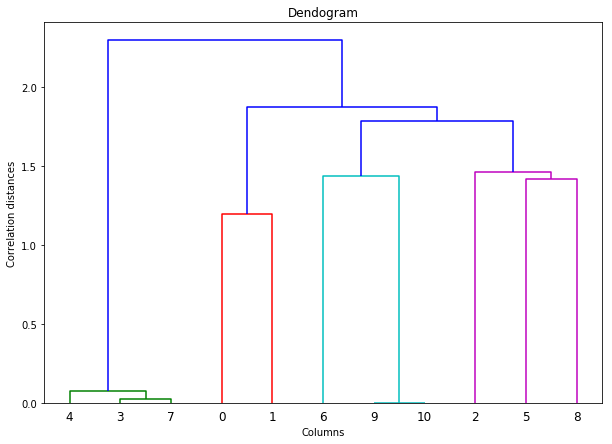

In [315]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
plt.xlabel('Columns')
plt.ylabel('Correlation distances')
#dist= shc.distance.pdist(merged.corr(), 'hamming')
dend = shc.dendrogram(shc.linkage(dist, method='complete'))
#dend = shc.dendrogram(shc.linkage(d, merged, method='complete'))


# Hierarchial Clustering1

In [16]:
from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='=complete')
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([0, 1, 1, 0, 4, 5, 2, 3, 0])

In [17]:
print(cluster.labels_)

[0 1 1 0 4 5 2 3 0]


In [18]:
dist1 = dist.iloc[:,0]
dist2 = dist.iloc[:,1]

In [25]:
dist1

0         01186
1         04185
2          1123
3          1179
4         20500
          ...  
634704     V053
634705    V1087
634706    80606
634707    E8801
634708    V4579
Name: ICD9_CODE, Length: 634709, dtype: object

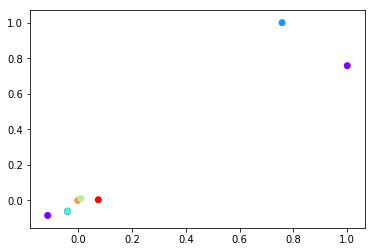

In [19]:
#plt.figure(figsize=(10, 7))
#plt.scatter(dist[:,0], dist[:,1], c=cluster.labels_, cmap='rainbow')

plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [26]:
dist1

0         01186
1         04185
2          1123
3          1179
4         20500
          ...  
634704     V053
634705    V1087
634706    80606
634707    E8801
634708    V4579
Name: ICD9_CODE, Length: 634709, dtype: object

# Clustering with 3 clusters

In [20]:
## 3 clusters 
cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([0, 1, 1, 0, 0, 0, 2, 0, 0])

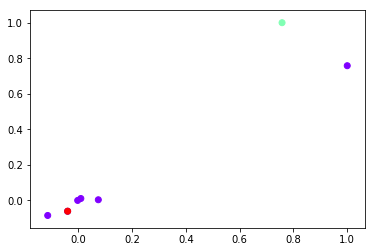

In [21]:

dist1 = dist.iloc[:,0]
dist2 = dist.iloc[:,1]
plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

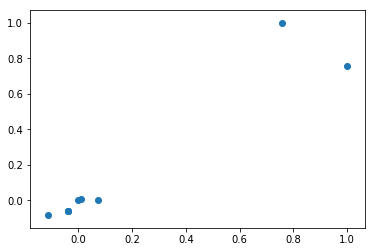

In [22]:
plt.scatter(dist1, dist2, cmap='rainbow')

# clustering for lvl2 code 

In [23]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([0, 1, 1, 0, 0, 0, 2, 0, 0])

In [24]:
dist1 = datamap.iloc[:,1] # lvl2 code
dist2 = datamap.iloc[:,7] # gender
print(dist1)

0         01186
1         04185
2          1123
3          1179
4         20500
          ...  
634704     V053
634705    V1087
634706    80606
634707    E8801
634708    V4579
Name: ICD9_CODE, Length: 634709, dtype: object


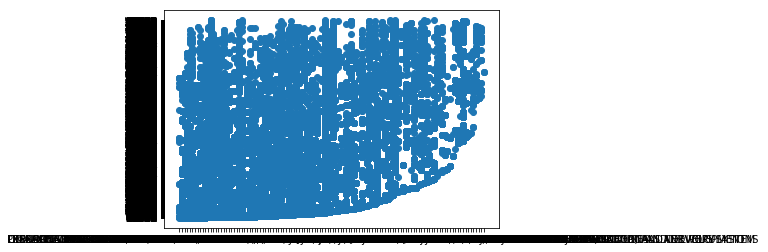

In [27]:
dist1 = datamap.iloc[:,1] # lvl2 code
dist2 = datamap.iloc[:,7] # gender

plt.scatter(dist2, dist1, cmap='rainbow')

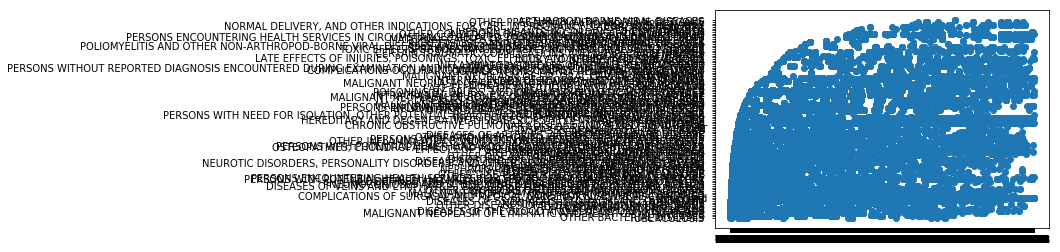

In [22]:
dist1 = datamap.iloc[:,1] # lvl2 code
dist2 = datamap.iloc[:,7] # gender

plt.scatter(dist1, dist2, cmap='rainbow')
#plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [23]:
dist.iloc[:,7]

ROW_ID_x       0.009830
lv.2_code      0.009710
Unnamed: 0    -0.000937
SUBJECT_ID    -0.001480
HADM_ID        0.002083
SEQ_NUM       -0.002999
ROW_ID_y      -0.000757
GENDER         1.000000
EXPIRE_FLAG   -0.009639
Name: GENDER, dtype: float64

ValueError: 'c' argument has 9 elements, which is not acceptable for use with 'x' with size 634709, 'y' with size 634709.

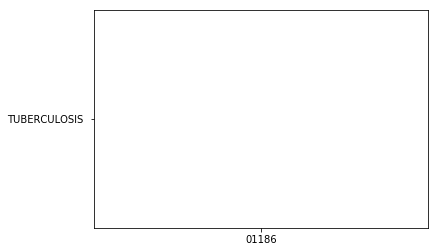

In [24]:
plt.scatter(dist1, dist2, c=cluster.labels_, cmap='rainbow')

In [ ]:
## gender. male female

# X  is ndarray
#An m by n array of m original observations in an n-dimensional space.

#X = 'GENDER'
#correlation matrix
d = sch.distance.pdist(merged.corr(), 'hamming')
L = sch.linkage(d, method='complete')
##corrleation distance for binary category var gender 
#d = sch.distance.pdist(X, lambda u, v: u != v)

# Clustering with euclidean distance 

In [ ]:



### euclidean distance 
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')  
cluster.fit_predict(datamap)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

In [ ]:
a = [[0,1,2,3,4,5,6] [a,b,c,d]] 


In [ ]:
a[:,0]